<a href="https://colab.research.google.com/github/shounakk05/ML_basic_projects/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imprting the Dependencies

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [68]:
df = pd.read_csv('/content/big_mart_data.csv')

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
df.shape

(8523, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Values:

Item_Identifier
Item_Fat_Content           
Item_Type                
Outlet_Identifier          
Outlet_Size               
Outlet_Location_Type       
Outlet_Type                


Handling Missing Values

1.   Mean -> Average Value [Numerical column(Item_Weight)]
2.   Mode -> Most Occuring Value [Categorical column(Outlet_Size)]

In [72]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [73]:
#Mean of Item_weight column
df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [74]:
#Filling the missing values in Item_Weight with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

/tmp/ipython-input-66672656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [75]:
#Mode of Outlet_Size column
df['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [76]:
#Filling the missing values of the Outlet_Size with mode value
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [77]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [78]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [79]:
sns.set()

/tmp/ipython-input-663393413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


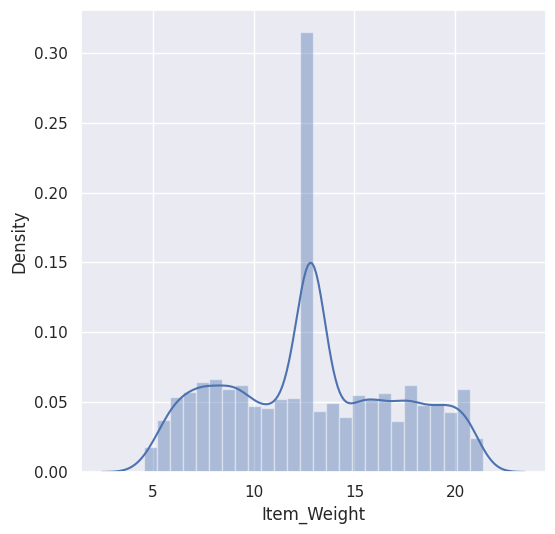

In [80]:
#Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

/tmp/ipython-input-2949249774.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


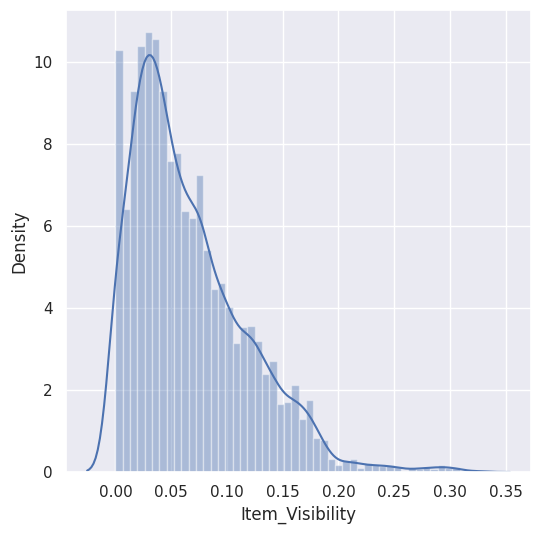

In [81]:
#Item Visibility Distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

/tmp/ipython-input-1230549418.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


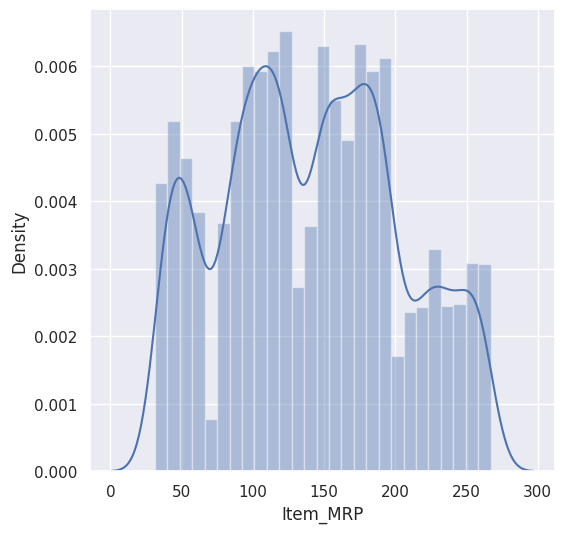

In [82]:
#Item MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

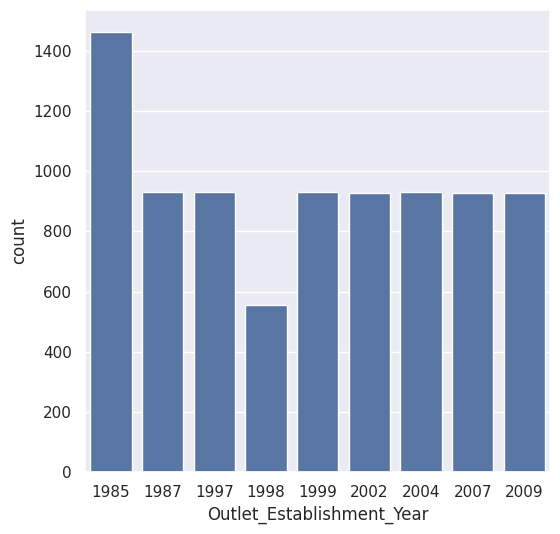

In [83]:
#Outlet Establishment Year Distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data = df)
plt.show()

Categorical Features

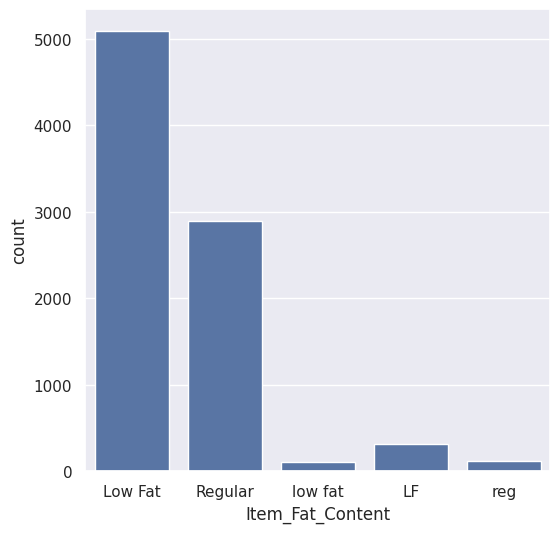

In [84]:
#Item Fat Content Distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data = df)
plt.show()

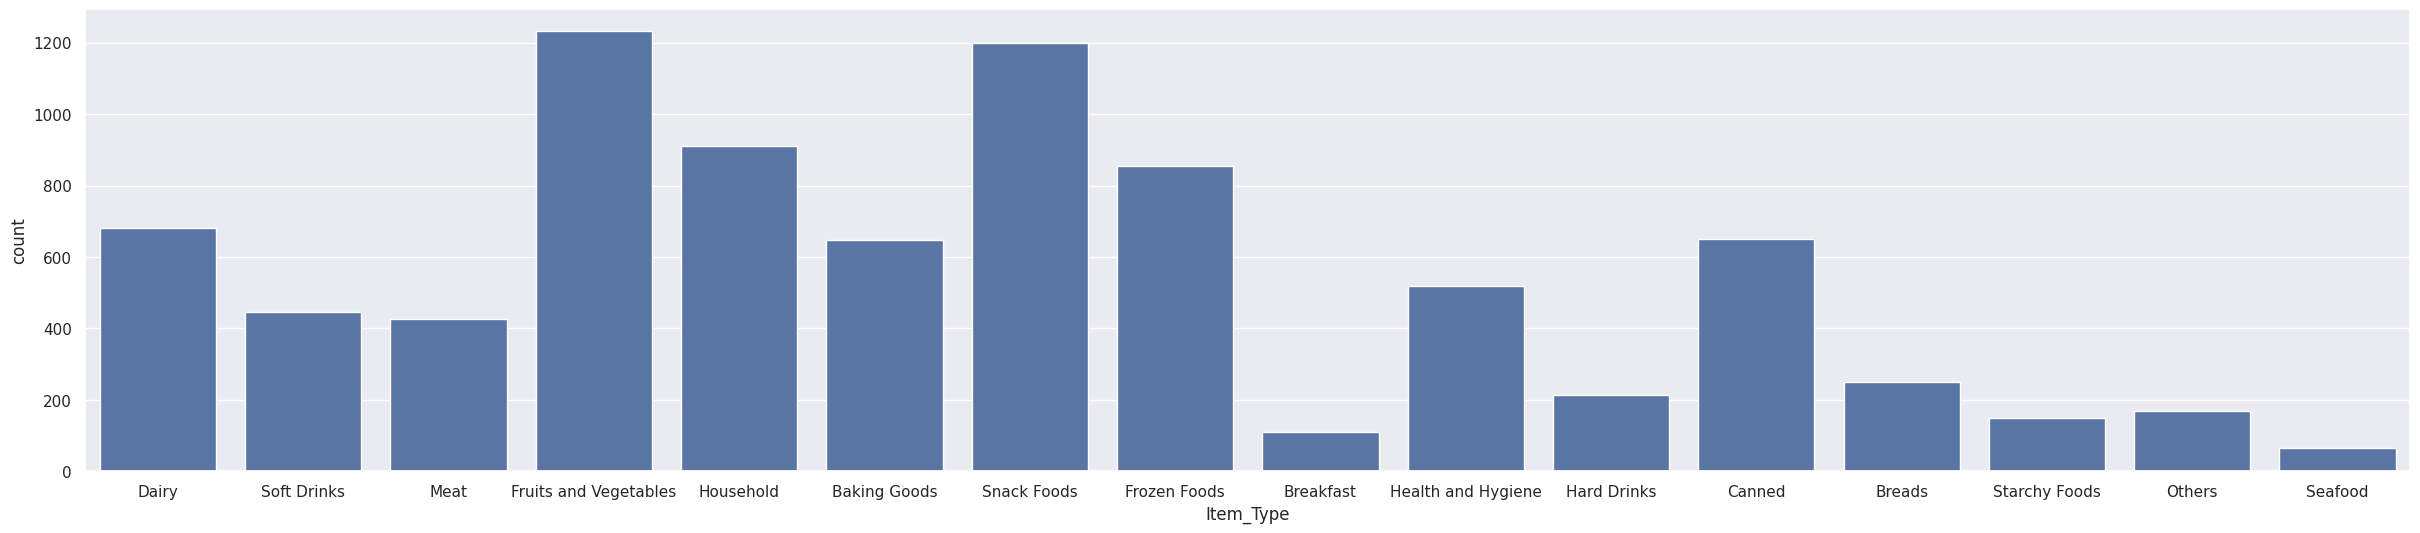

In [85]:
#Item Type Distribution
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type", data = df)
plt.show()

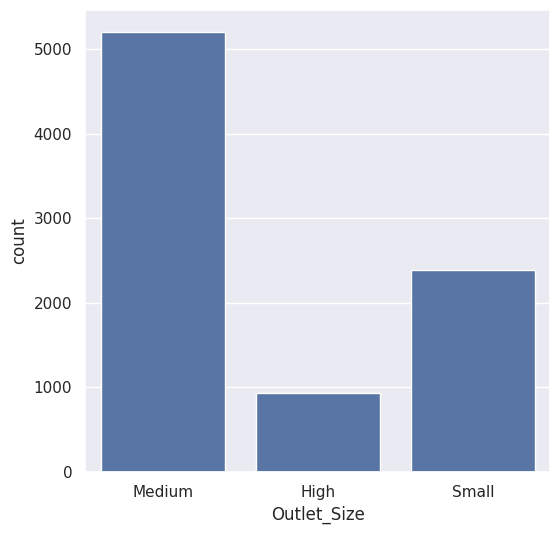

In [86]:
#Outlet Size Distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size", data = df)
plt.show()

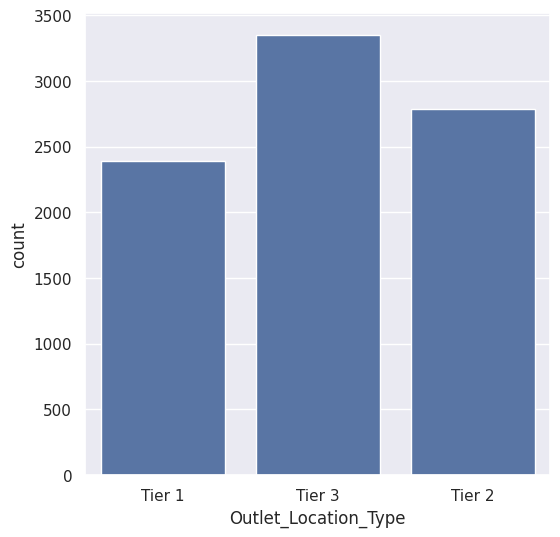

In [87]:
#Outlet Location Type Distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type", data = df)
plt.show()

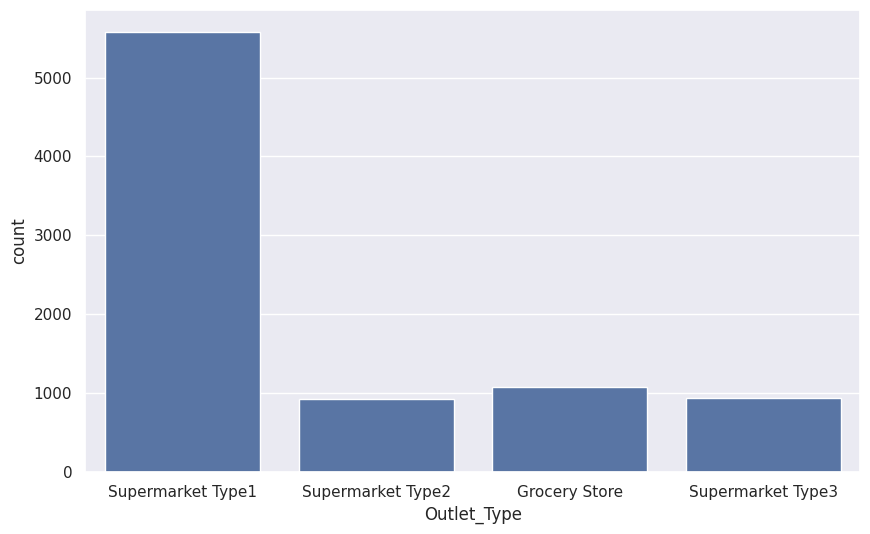

In [88]:
#Outlet Type Distribution
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type", data = df)
plt.show()

Data Preprocessing

In [89]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
#Correcting Item Fat Content
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [91]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [92]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [93]:
encoder = LabelEncoder()

In [94]:
encoder_item_identifier = LabelEncoder()
encoder_item_type = LabelEncoder()
encoder_outlet_identifier = LabelEncoder()
encoder_outlet_location_type = LabelEncoder()
encoder_outlet_type = LabelEncoder()
encoder_item_fat_content = LabelEncoder()
encoder_outlet_size = LabelEncoder()

df['Item_Identifier'] = encoder_item_identifier.fit_transform(df['Item_Identifier'])
df['Item_Type'] = encoder_item_type.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder_outlet_identifier.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type'] = encoder_outlet_location_type.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder_outlet_type.fit_transform(df['Outlet_Type'])
df['Item_Fat_Content'] = encoder_item_fat_content.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size'] = encoder_outlet_size.fit_transform(df['Outlet_Size'])

In [95]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target

In [96]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [98]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [99]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Train Test Split

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [102]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [103]:
print(Y.shape, Y_train.shape, Y_test.shape)

(8523,) (6818,) (1705,)


Training the Model(XGBoostRegressor)

In [104]:
regressor = XGBRegressor()

In [105]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [114]:
#Training Data Prediction
train_data_pred = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Value:",r2_train)

R Squared Value: 0.8759287778441955


In [117]:
#Test Data Prediction
test_data_pred = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Value:",r2_test)

R Squared Value: 0.5060117482714839
